In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

%matplotlib inline

# Import ETF

In [2]:
df_ETF = pd.read_excel(r'C:\Users\Aleksejus\VCS\Savarankiškas\Euro_Stoxx.xlsx', sheet_name='ETF_original')
df_ETF.head(5)

,Date,Open,High,Low,Close,Volume
0,2019-07-24 12:40:00,35.915,35.915,35.915,35.915,500
1,2019-07-24 12:30:00,35.895,35.895,35.895,35.895,635
2,2019-07-24 12:20:00,35.875,35.875,35.875,35.875,20
3,2019-07-24 12:00:00,35.865,35.865,35.835,35.835,6252
4,2019-07-24 11:50:00,35.865,35.875,35.865,35.875,5927


In [3]:
df_ETF['ETF_Change_in_10_min'] = (df_ETF['Close'] - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_20_min'] = (df_ETF['Close'].shift(1) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_30_min'] = (df_ETF['Close'].shift(2) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_40_min'] = (df_ETF['Close'].shift(3) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_50_min'] = (df_ETF['Close'].shift(4) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_60_min'] = (df_ETF['Close'].shift(5) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['High_minus_Low'] = df_ETF['High'] - df_ETF['Low']
df_ETF.head()

,Date,Open,High,Low,Close,Volume,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,High_minus_Low
0,2019-07-24 12:40:00,35.915,35.915,35.915,35.915,500,0.000000,NaN,NaN,NaN,NaN,NaN,0.00
1,2019-07-24 12:30:00,35.895,35.895,35.895,35.895,635,0.000000,0.055718,NaN,NaN,NaN,NaN,0.00
2,2019-07-24 12:20:00,35.875,35.875,35.875,35.875,20,0.000000,0.055749,0.111498,NaN,NaN,NaN,0.00
3,2019-07-24 12:00:00,35.865,35.865,35.835,35.835,6252,-0.083647,0.027882,0.083647,0.139412,NaN,NaN,0.03
4,2019-07-24 11:50:00,35.865,35.875,35.865,35.875,5927,0.027882,-0.083647,0.027882,0.083647,0.139412,NaN,0.01


In [4]:
# df_ETF.to_excel("test3.xlsx", sheet_name = 'Test1')

In [5]:
df_ETF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41417 entries, 0 to 41416
Data columns (total 13 columns):
Date                    41417 non-null datetime64[ns]
Open                    41417 non-null float64
High                    41417 non-null float64
Low                     41417 non-null float64
Close                   41417 non-null float64
Volume                  41417 non-null int64
ETF_Change_in_10_min    41417 non-null float64
ETF_Change_in_20_min    41416 non-null float64
ETF_Change_in_30_min    41415 non-null float64
ETF_Change_in_40_min    41414 non-null float64
ETF_Change_in_50_min    41413 non-null float64
ETF_Change_in_60_min    41412 non-null float64
High_minus_Low          41417 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 4.1 MB


How to change column name

In [6]:
# df_ETF = df_ETF.rename(columns = {'Date':'Date_time'})
# df_ETF.head(5)

# Import GDP

In [7]:
df_Unem = pd.read_excel(r'C:\Users\Aleksejus\VCS\Savarankiškas\Euro_Stoxx.xlsx', sheet_name='GDP')
df_Unem.head(5)

,Date,Time,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised
0,2001-06-08,12:00:00,1Q A,0.005,0.005,0.006,0.005,0,0.005,0.007,- -
1,2001-07-13,12:00:00,1Q P,0.005,0.005,0.006,0.004,18,0.006,0.006,0.008
2,2001-08-03,12:00:00,1Q F,- -,- -,- -,- -,0,0.005,0.006,- -
3,2001-09-13,12:00:00,2Q A,0.001,0.001,0.002,0,11,0.001,0.005,- -
4,2001-10-11,12:00:00,2Q P,0.001,0.001,0.001,0,5,0.001,0.005,0.001


Creating new Date & Time Column

In [8]:
df_Unem['Date_time'] = pd.to_datetime(df_Unem['Date'].apply(str)+' '+df_Unem['Time'].apply(str))
df_Unem.head(5)

,Date,Time,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised,Date_time
0,2001-06-08,12:00:00,1Q A,0.005,0.005,0.006,0.005,0,0.005,0.007,- -,2001-06-08 12:00:00
1,2001-07-13,12:00:00,1Q P,0.005,0.005,0.006,0.004,18,0.006,0.006,0.008,2001-07-13 12:00:00
2,2001-08-03,12:00:00,1Q F,- -,- -,- -,- -,0,0.005,0.006,- -,2001-08-03 12:00:00
3,2001-09-13,12:00:00,2Q A,0.001,0.001,0.002,0,11,0.001,0.005,- -,2001-09-13 12:00:00
4,2001-10-11,12:00:00,2Q P,0.001,0.001,0.001,0,5,0.001,0.005,0.001,2001-10-11 12:00:00


# Merge data sets

In [61]:
df = pd.merge(df_ETF, df_Unem, left_on='Date', right_on='Date_time')
df.head(5)

,Date_x,Open,High,Low,Close,Volume,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,...,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised,Date_time
0,2019-06-06 11:00:00,34.410,34.410,34.410,34.410,500,0.000000,0.174368,0.116245,0.116245,...,1Q F,0.004,0.004,0.004,0.004,36,0.004,0.004,- -,2019-06-06 11:00:00
1,2019-05-15 11:00:00,33.985,34.015,33.985,34.015,1355,0.088274,0.205973,-0.058849,-0.191261,...,1Q P,0.004,0.004,0.004,0.003,46,0.004,0.004,- -,2019-05-15 11:00:00
2,2019-03-07 11:00:00,33.225,33.270,33.225,33.250,18946,0.075245,0.075245,0.105342,0.090293,...,4Q F,0.002,0.002,0.002,0.002,40,0.002,0.002,- -,2019-03-07 11:00:00
3,2018-12-07 11:00:00,30.935,30.955,30.935,30.945,2172,0.032326,-0.177792,-0.113140,-0.129303,...,3Q F,0.002,0.002,0.003,0.002,41,0.002,0.002,- -,2018-12-07 11:00:00
4,2018-11-14 11:00:00,32.000,32.020,32.000,32.020,13120,0.062500,0.140625,0.203125,0.234375,...,3Q P,0.002,0.002,0.003,0.001,44,0.002,0.002,0.002,2018-11-14 11:00:00


In [10]:
# df.info()

How to export Data to excel

In [11]:
# df.to_excel("test.xlsx", sheet_name = 'Test1')

Cleaning non need columns

In [62]:
df=df[['Date_time','ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min','ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Srv Med','Srv Num','Actual']]

df.head()

,Date_time,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Srv Med,Srv Num,Actual
0,2019-06-06 11:00:00,0.000000,0.174368,0.116245,0.116245,0.145307,0.116245,500,0.000,0.004,36,0.004
1,2019-05-15 11:00:00,0.088274,0.205973,-0.058849,-0.191261,-0.014712,-0.191261,1355,0.030,0.004,46,0.004
2,2019-03-07 11:00:00,0.075245,0.075245,0.105342,0.090293,0.075245,0.075245,18946,0.045,0.002,40,0.002
3,2018-12-07 11:00:00,0.032326,-0.177792,-0.113140,-0.129303,-0.096978,-0.145466,2172,0.020,0.002,41,0.002
4,2018-11-14 11:00:00,0.062500,0.140625,0.203125,0.234375,0.390625,0.328125,13120,0.020,0.002,44,0.002


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 12 columns):
Date_time               98 non-null datetime64[ns]
ETF_Change_in_10_min    98 non-null float64
ETF_Change_in_20_min    98 non-null float64
ETF_Change_in_30_min    98 non-null float64
ETF_Change_in_40_min    98 non-null float64
ETF_Change_in_50_min    98 non-null float64
ETF_Change_in_60_min    98 non-null float64
Volume                  98 non-null int64
High_minus_Low          98 non-null float64
Srv Med                 98 non-null object
Srv Num                 98 non-null int64
Actual                  98 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 10.0+ KB


In [65]:
df = df.rename(columns = {'Srv Med':'Srv_Med'})
df['Srv_Med'] = pd.to_numeric(df.Srv_Med)

SyntaxError: invalid syntax (<ipython-input-65-ab474f2b460d>, line 1)

Creating new columns

In [14]:
df['Surprises'] = (df['Actual'] - df['Srv_Med']) / df['Srv_Med']*100
df

,Date_time,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Srv_Med,Srv Num,Actual,Surprises
0,2019-06-06 11:00:00,0.000000,0.174368,0.116245,0.116245,0.145307,0.116245,500,0.000,0.004,36,0.004,0.000000
1,2019-05-15 11:00:00,0.088274,0.205973,-0.058849,-0.191261,-0.014712,-0.191261,1355,0.030,0.004,46,0.004,0.000000
2,2019-03-07 11:00:00,0.075245,0.075245,0.105342,0.090293,0.075245,0.075245,18946,0.045,0.002,40,0.002,0.000000
3,2018-12-07 11:00:00,0.032326,-0.177792,-0.113140,-0.129303,-0.096978,-0.145466,2172,0.020,0.002,41,0.002,0.000000
4,2018-11-14 11:00:00,0.062500,0.140625,0.203125,0.234375,0.390625,0.328125,13120,0.020,0.002,44,0.002,0.000000
5,2018-09-07 11:00:00,0.074850,0.164671,0.164671,-0.014970,-0.104790,-0.119760,2547,0.025,0.004,36,0.004,0.000000
6,2018-08-14 11:00:00,0.057595,0.115191,0.115191,0.071994,0.014399,-0.014399,2235,0.020,0.003,39,0.004,33.333333
7,2018-07-31 11:00:00,0.000000,0.013996,-0.111966,-0.013996,0.013996,-0.055983,4910,0.000,0.004,47,0.003,-25.000000
8,2018-06-07 11:00:00,0.028173,-0.070432,0.014086,-0.056346,-0.042259,-0.070432,10074,0.020,0.004,42,0.004,0.000000
9,2018-05-15 11:00:00,-0.041580,-0.110880,-0.055440,-0.055440,-0.055440,-0.055440,16602,0.015,0.004,46,0.004,0.000000


In [15]:
# df.info()

Changing Suprises from object to float

In [16]:
# df['Surprises'] = pd.to_numeric(df.Surprises)

In [17]:
# df.info()

In [18]:
# df.to_excel("test2.xlsx", sheet_name = 'Test1')

In [19]:
# df['ETF_Change_in_10_min'].mean()


In [20]:
data = [
        [0,0,0,],
        [df['ETF_Change_in_10_min'].min()*100,df['ETF_Change_in_10_min'].mean()*100,df['ETF_Change_in_10_min'].max()*100],
        [df['ETF_Change_in_20_min'].min()*100,df['ETF_Change_in_20_min'].mean()*100,df['ETF_Change_in_20_min'].max()*100],
        [df['ETF_Change_in_30_min'].min()*100,df['ETF_Change_in_30_min'].mean()*100,df['ETF_Change_in_30_min'].max()*100],
        [df['ETF_Change_in_40_min'].min()*100,df['ETF_Change_in_40_min'].mean()*100,df['ETF_Change_in_40_min'].max()*100],
        [df['ETF_Change_in_50_min'].min()*100,df['ETF_Change_in_50_min'].mean()*100,df['ETF_Change_in_50_min'].max()*100],
        [df['ETF_Change_in_60_min'].min()*100,df['ETF_Change_in_60_min'].mean()*100,df['ETF_Change_in_60_min'].max()*100]
       ]
df4 = pd.DataFrame(data,columns=['Min','Avg','Max'], index=['0','10','20',
                                                           '30','40',
                                                           '50','60'])
df4

,Min,Avg,Max
0,0.000000,0.000000,0.000000
10,-90.777052,0.281988,37.209302
20,-80.753701,2.878419,73.041169
30,-79.883805,1.119996,65.014222
40,-159.767611,-0.391835,113.394755
50,-76.179859,-0.921478,104.200064
60,-83.514887,-5.142761,99.390830


In [21]:
# df4.to_csv(r'C:\Users\Aleksejus\VCS\Savarankiškas\Test3.csv')

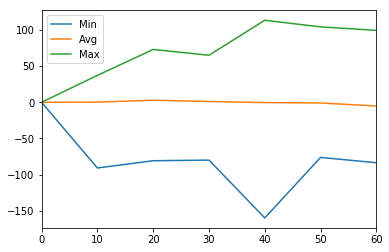

In [22]:
df4[['Min', 'Avg', 'Max']].plot()

Text(0, 0.5, 'Euro Stoxx 50 ETF %Chg')

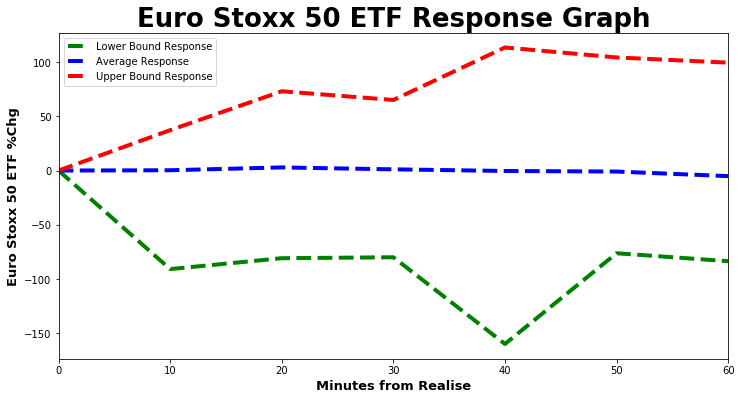

In [23]:
df4[['Min', 'Avg', 'Max']].plot(figsize=(12,6),LineWidth=4, color = ['g','b','r'], LineStyle = '--')
plt.title('Euro Stoxx 50 ETF Response Graph',fontsize=26, color='Black', weight="bold")
plt.legend(['Lower Bound Response','Average Response','Upper Bound Response'])
plt.xlabel('Minutes from Realise', fontsize=13, color='Black', weight="bold")
plt.ylabel('Euro Stoxx 50 ETF %Chg', fontsize=13, color='Black', weight="bold")



# Corr matrix with all data

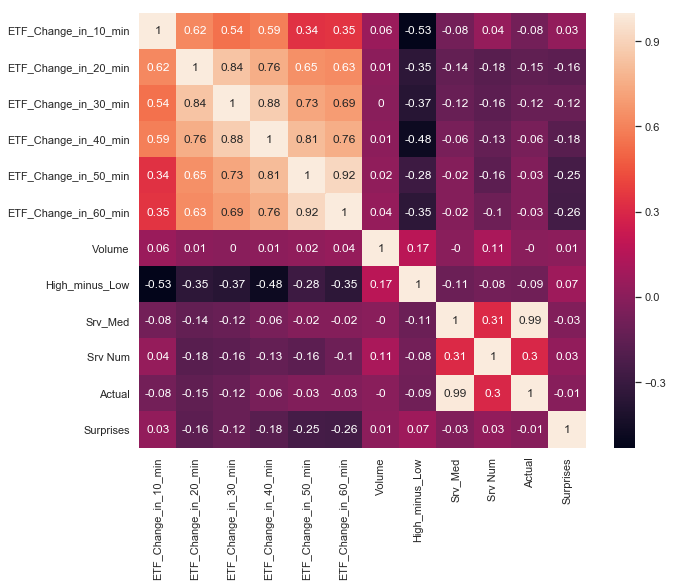

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [25]:
df0=df[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df0.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
0,0.000000,0.174368,0.116245,0.116245,0.145307,0.116245,500,0.000,0.0
1,0.088274,0.205973,-0.058849,-0.191261,-0.014712,-0.191261,1355,0.030,0.0
2,0.075245,0.075245,0.105342,0.090293,0.075245,0.075245,18946,0.045,0.0
3,0.032326,-0.177792,-0.113140,-0.129303,-0.096978,-0.145466,2172,0.020,0.0
4,0.062500,0.140625,0.203125,0.234375,0.390625,0.328125,13120,0.020,0.0


C:\Users\Aleksejus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aleksejus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


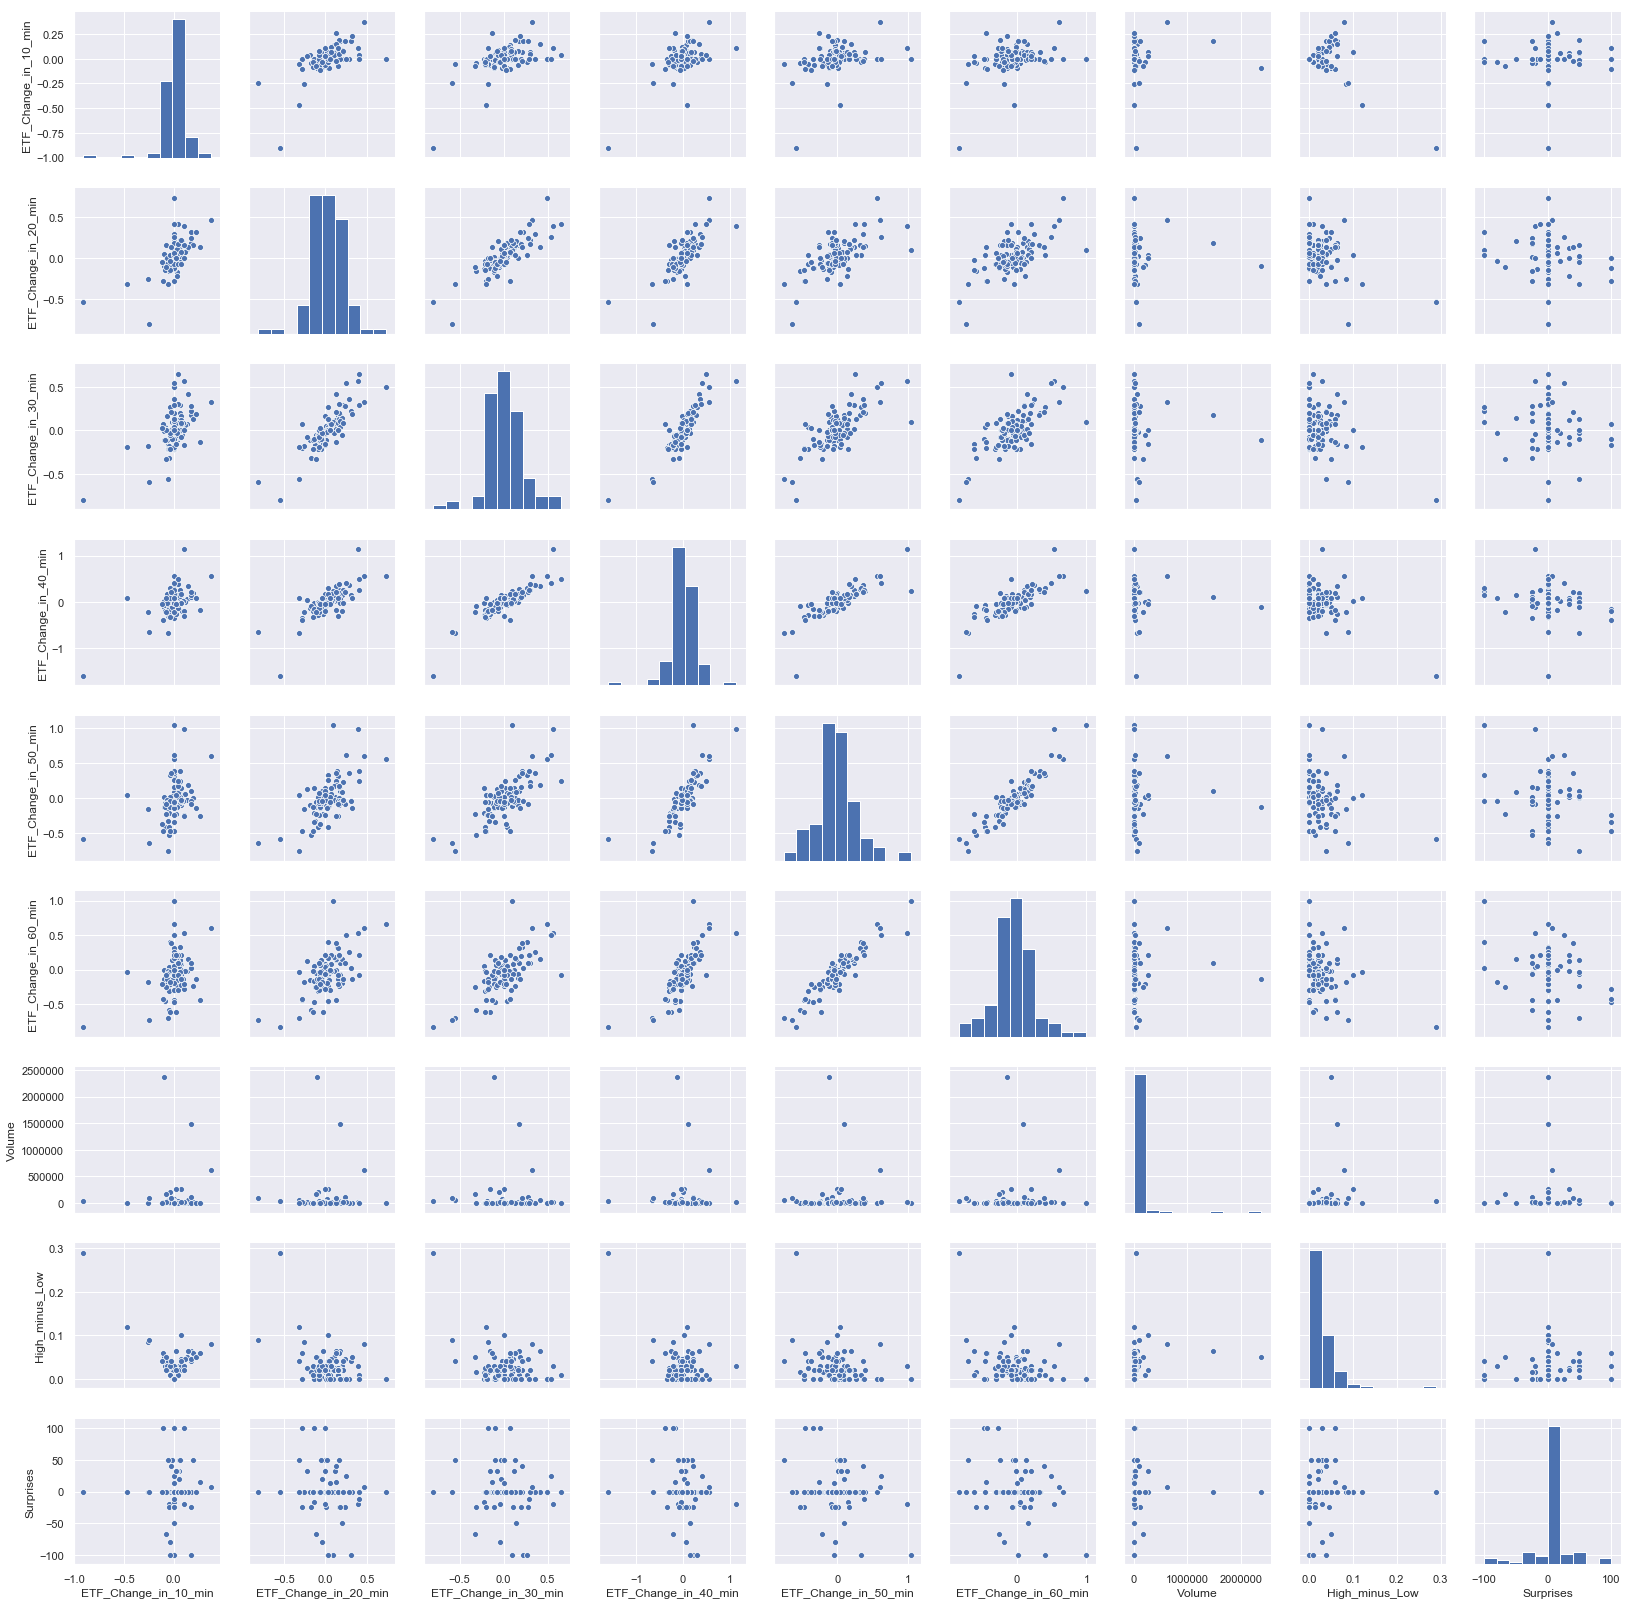

In [26]:
sns.pairplot(df0)

# Corr matrix and modeling where surprise values > 0

In [27]:
df1 = df[df['Surprises'] > 0]


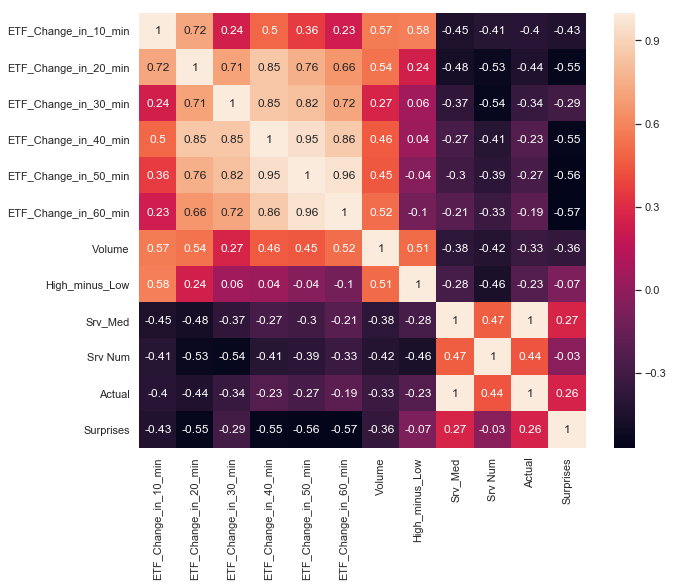

In [28]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [29]:
df1=df1[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df1.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
6,0.057595,0.115191,0.115191,0.071994,0.014399,-0.014399,2235,0.020,33.333333
18,0.055218,-0.041414,-0.027609,0.013805,0.096632,0.055218,1122,0.020,20.000000
31,0.193175,0.160979,0.128783,0.193175,0.000000,-0.241468,19366,0.060,50.000000
36,0.029990,-0.224921,-0.074974,0.044984,0.134953,0.119958,29510,0.025,33.333333
41,0.057405,0.000000,-0.028703,0.086108,0.100459,-0.057405,10500,0.030,50.000000


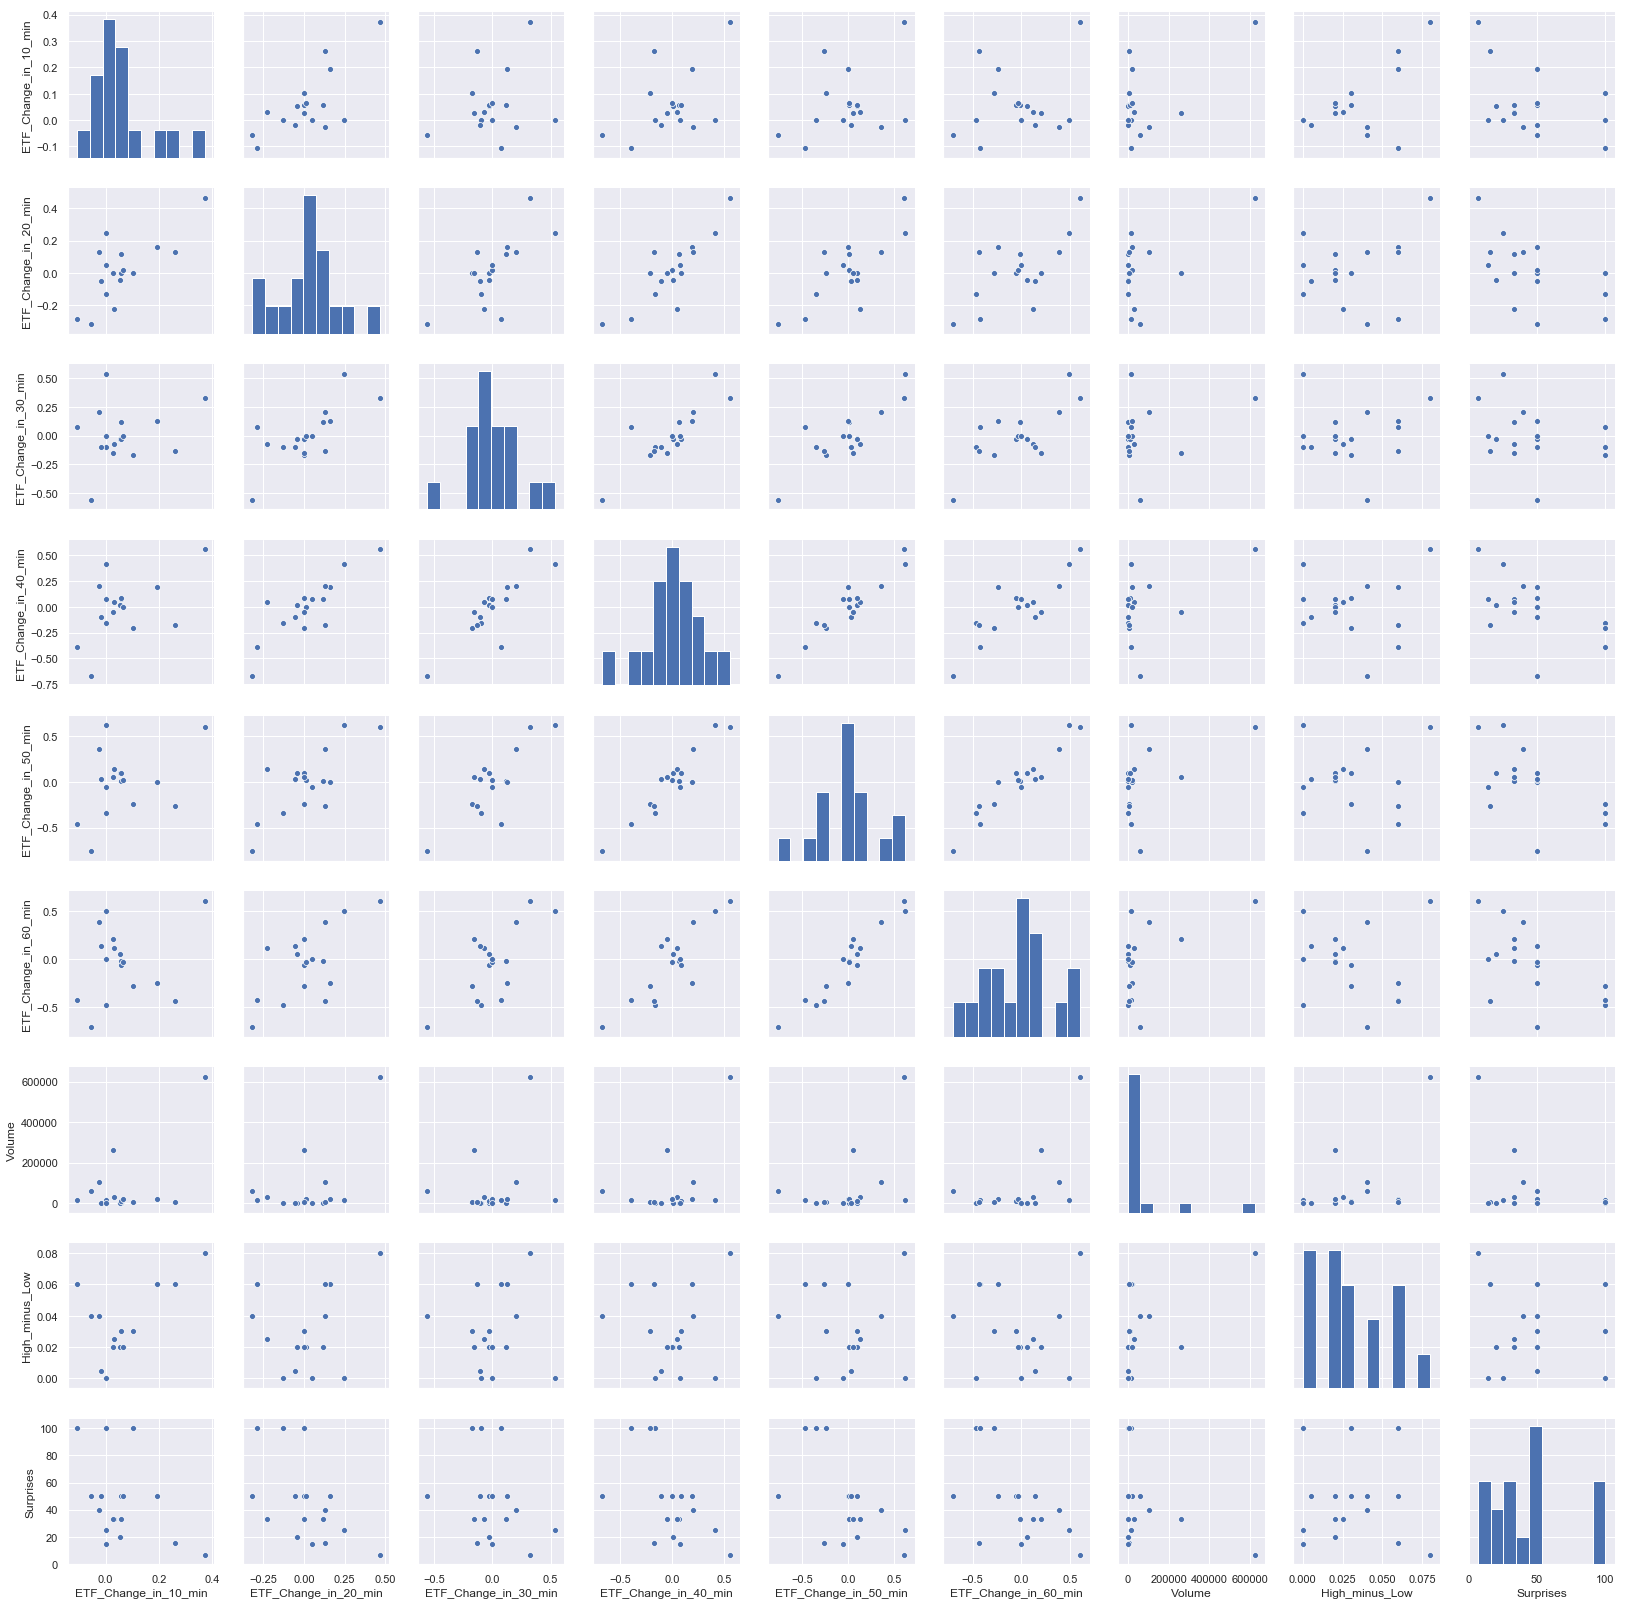

In [30]:
sns.pairplot(df1)

How drop row

In [31]:
# df1 = df1.drop(112)
# df1

# Forecasting

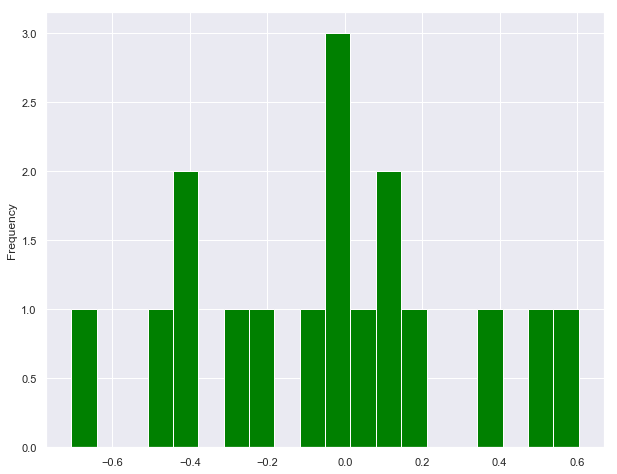

In [32]:
df1.ETF_Change_in_60_min.plot.hist(bins = 20, color = 'green')

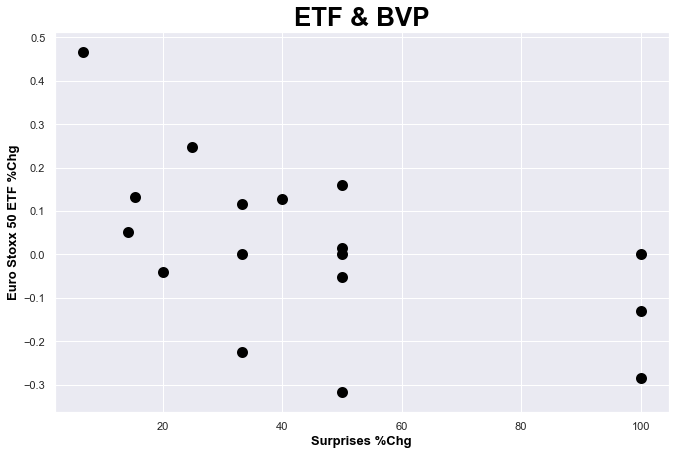

In [33]:
plt.figure(figsize=(11, 7))

features = ['Surprises']
target = df1['ETF_Change_in_20_min']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df1[col]
    y = target
    plt.scatter(x, y, marker='o', color = 'black', linewidth = 5 )
    plt.title('ETF & BVP',fontsize=26, color='Black', weight="bold")
    plt.xlabel('Surprises %Chg',fontsize=13, color='Black', weight="bold")
    plt.ylabel('Euro Stoxx 50 ETF %Chg', fontsize=13, color='Black', weight="bold")

In [34]:
est = smf.ols('ETF_Change_in_20_min ~ Surprises', df1).fit()
est.summary()

C:\Users\Aleksejus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ETF_Change_in_20_min   R-squared:                       0.303
Model:                              OLS   Adj. R-squared:                  0.257
Method:                   Least Squares   F-statistic:                     6.523
Date:                  Fri, 02 Aug 2019   Prob (F-statistic):             0.0220
Time:                          20:18:52   Log-Likelihood:                 7.3453
No. Observations:                    17   AIC:                            -10.69
Df Residuals:                        15   BIC:                            -9.024
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1799      0.076      2.367      0.032       0.018       0.342
Surprises     -0.0036      0.001     -2.554      0.022      -0.007      -0.001
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.173
Skew:                          -0.219   Prob(JB):                        0.917
Kurtosis:                       2.771   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
x = df1[['Surprises']].values
y = df1[['ETF_Change_in_20_min']].values

# Split data to train and test

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [37]:
### Aprašomi training ir test rodikliai, kur 20% skiriame test analizei

# Model

In [38]:
lm = LinearRegression()

In [39]:
### Toliau sukursime tiesinės regresijos modelį naudodami train ir test duomenų rinkinius

In [40]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
yPrediction = lm.predict(x_test)

# Training data graph

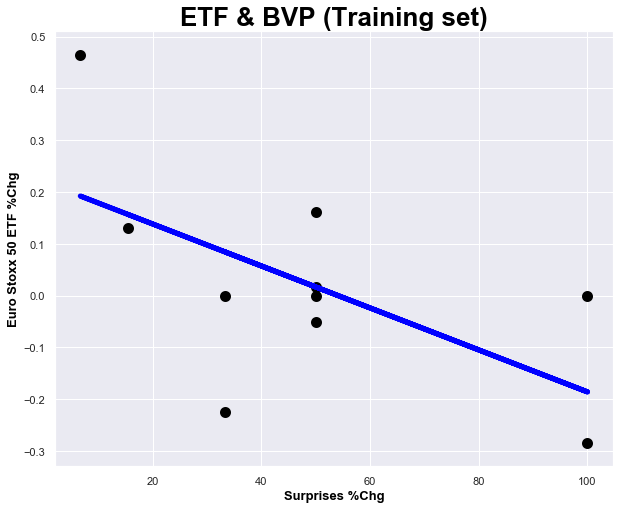

In [42]:
plt.scatter(x_train, y_train, color = 'black', linewidth = 5)
plt.plot(x_train, lm.predict(x_train), color = 'blue', linewidth = 5)
plt.title('ETF & BVP (Training set)',fontsize=26, color='Black', weight="bold")
plt.xlabel('Surprises %Chg',fontsize=13, color='Black', weight="bold")
plt.ylabel('Euro Stoxx 50 ETF %Chg', fontsize=13, color='Black', weight="bold")
plt.show()

# model coef

In [43]:
lm.score(x,y)

0.287792890380153

In [44]:
lm.coef_

array([[-0.00405425]])

In [45]:
lm.intercept_

array([0.2193296])

# Test data graph

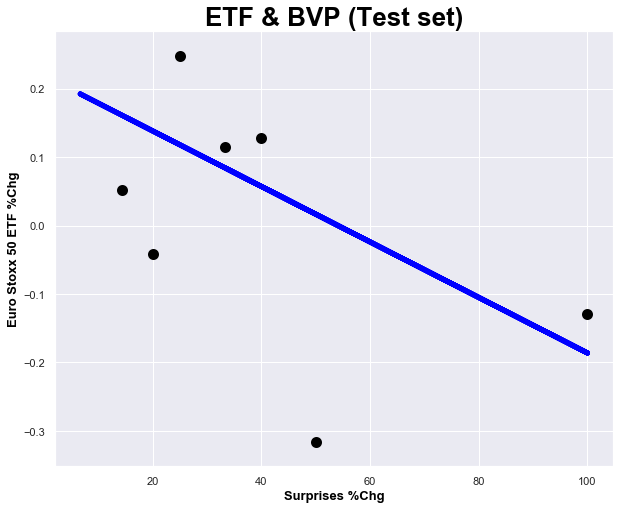

In [46]:
plt.scatter(x_test, y_test, color = 'black', linewidth = 5)
plt.plot(x_train, lm.predict(x_train), color = 'blue', linewidth = 5)
plt.plot(x_train, lm.predict(x_train), color = 'blue', linewidth = 5)
plt.title('ETF & BVP (Test set)',fontsize=26, color='Black', weight="bold")
plt.xlabel('Surprises %Chg',fontsize=13, color='Black', weight="bold")
plt.ylabel('Euro Stoxx 50 ETF %Chg', fontsize=13, color='Black', weight="bold")
plt.show()

In [47]:
lm.coef_

array([[-0.00405425]])

In [48]:
lm.intercept_

array([0.2193296])

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
print("R^2: {}".format(lm.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,yPrediction))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.1456976262299261
Root Mean Squared Error: 0.16070828008626542


# ---------

# Creating Correl Matrix where surprises values < 0

In [51]:
df2 = df[df['Surprises'] < 0]

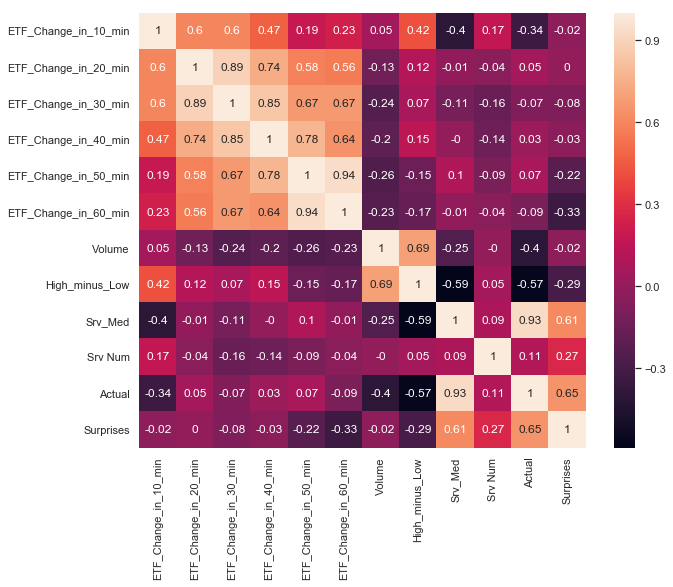

In [52]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [53]:
df2=df2[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df2.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
7,0.000000,0.013996,-0.111966,-0.013996,0.013996,-0.055983,4910,0.000,-25.000000
22,-0.044998,0.000000,-0.044998,-0.104995,-0.089996,0.044998,7740,0.015,-20.000000
30,0.000000,-0.134386,-0.218377,-0.033597,0.151184,0.050395,7000,0.000,-16.666667
35,0.000000,-0.278961,-0.205550,-0.352371,-0.469828,-0.440464,16293,0.000,-25.000000
37,-0.041649,-0.166597,-0.319311,-0.083299,-0.527558,-0.583090,2090,0.015,-25.000000


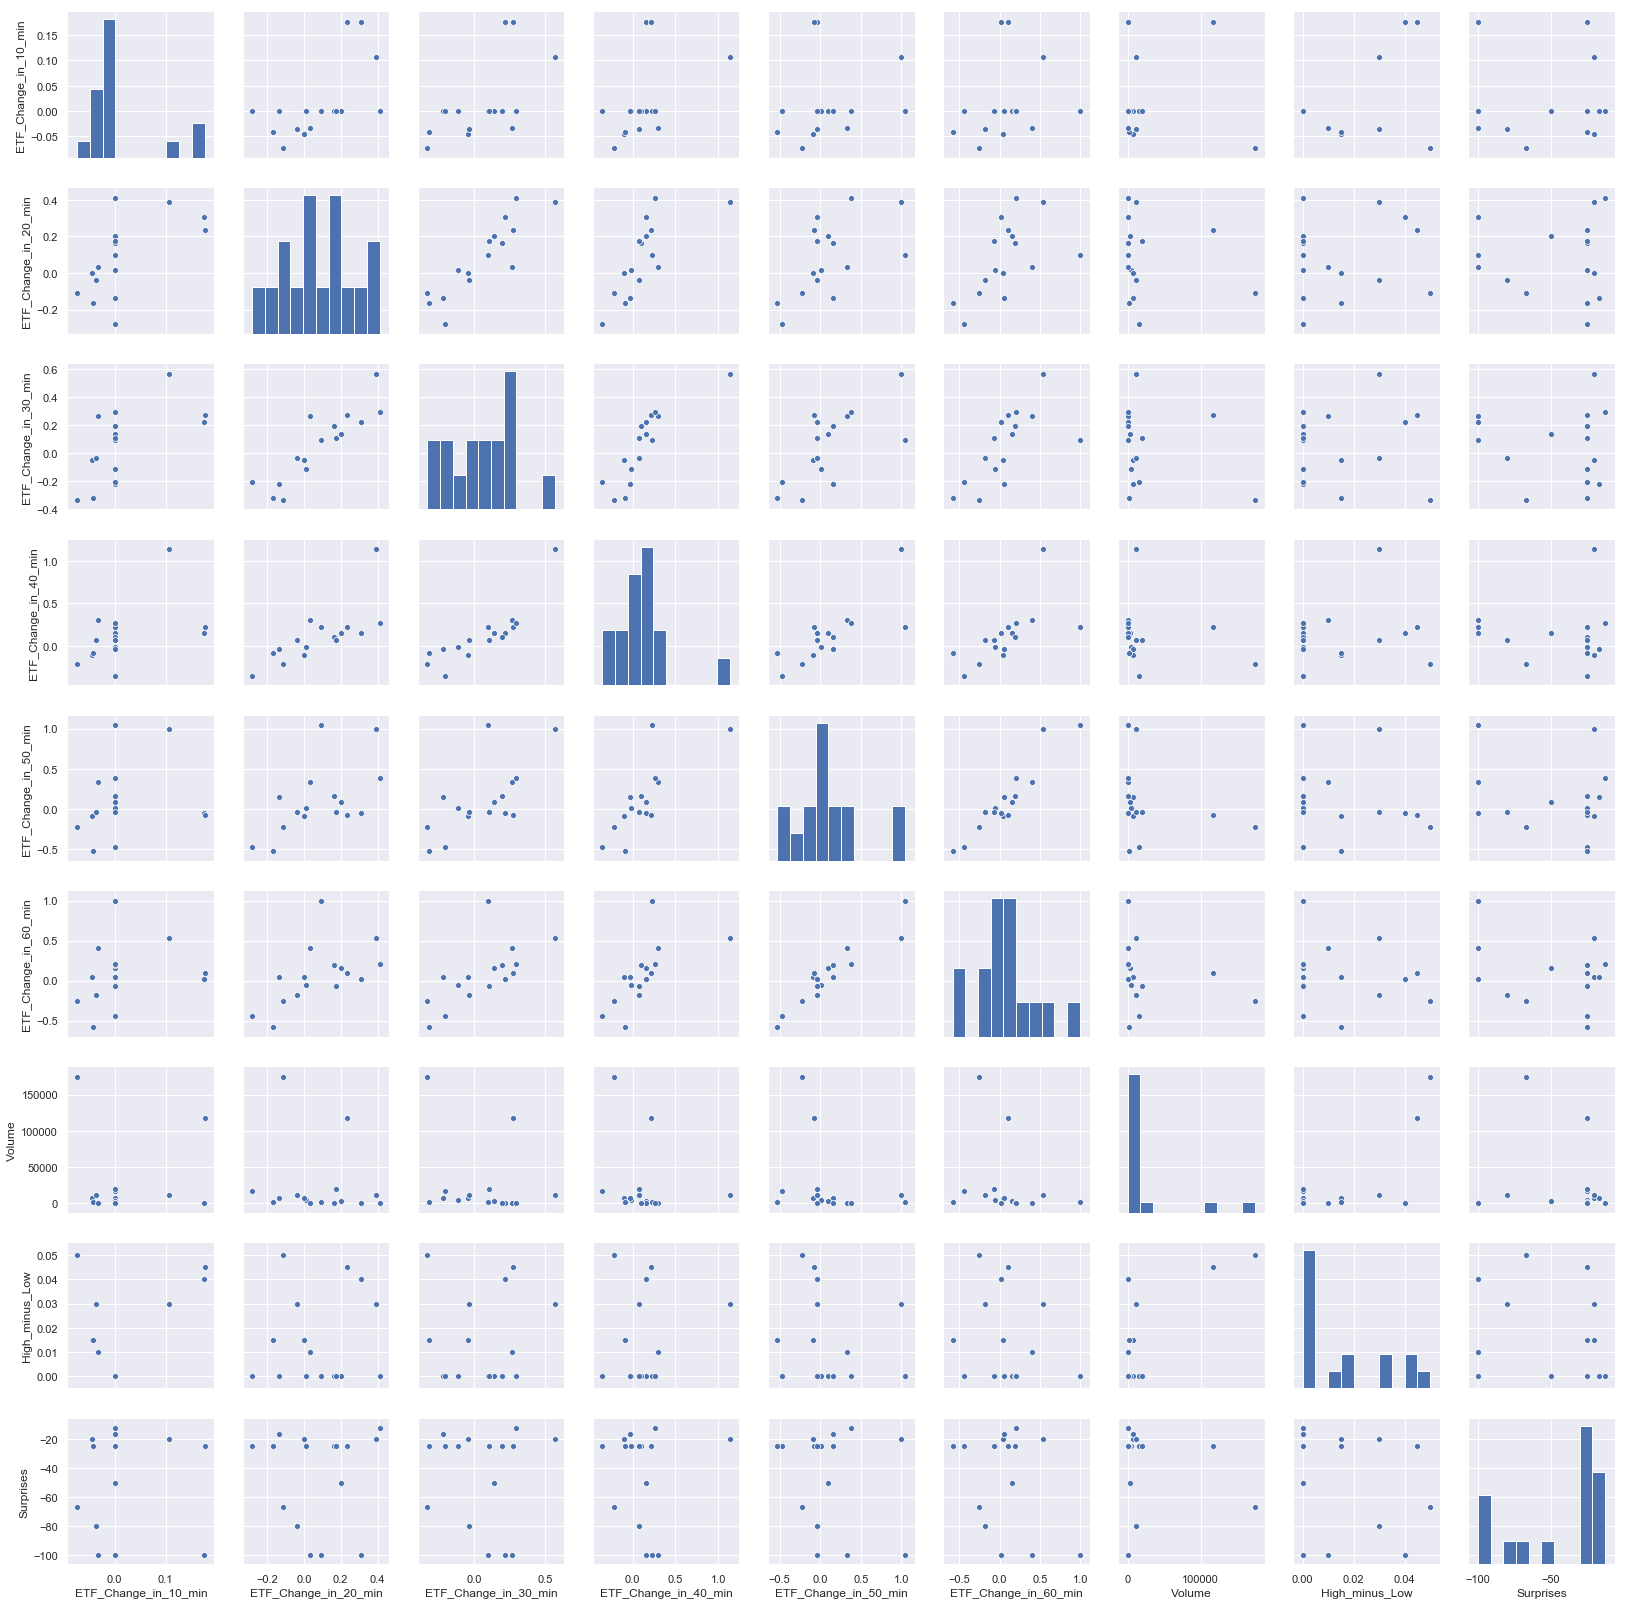

In [54]:
sns.pairplot(df2)

# Creating Correl Matrix where surprises values = 0

In [55]:
df3 = df[df['Surprises'] == 0]

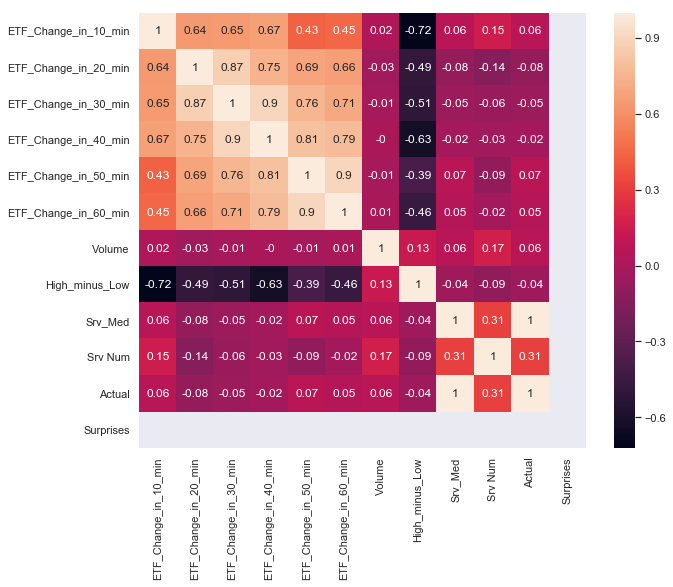

In [56]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df3.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [57]:
df3=df3[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df3.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
0,0.000000,0.174368,0.116245,0.116245,0.145307,0.116245,500,0.000,0.0
1,0.088274,0.205973,-0.058849,-0.191261,-0.014712,-0.191261,1355,0.030,0.0
2,0.075245,0.075245,0.105342,0.090293,0.075245,0.075245,18946,0.045,0.0
3,0.032326,-0.177792,-0.113140,-0.129303,-0.096978,-0.145466,2172,0.020,0.0
4,0.062500,0.140625,0.203125,0.234375,0.390625,0.328125,13120,0.020,0.0


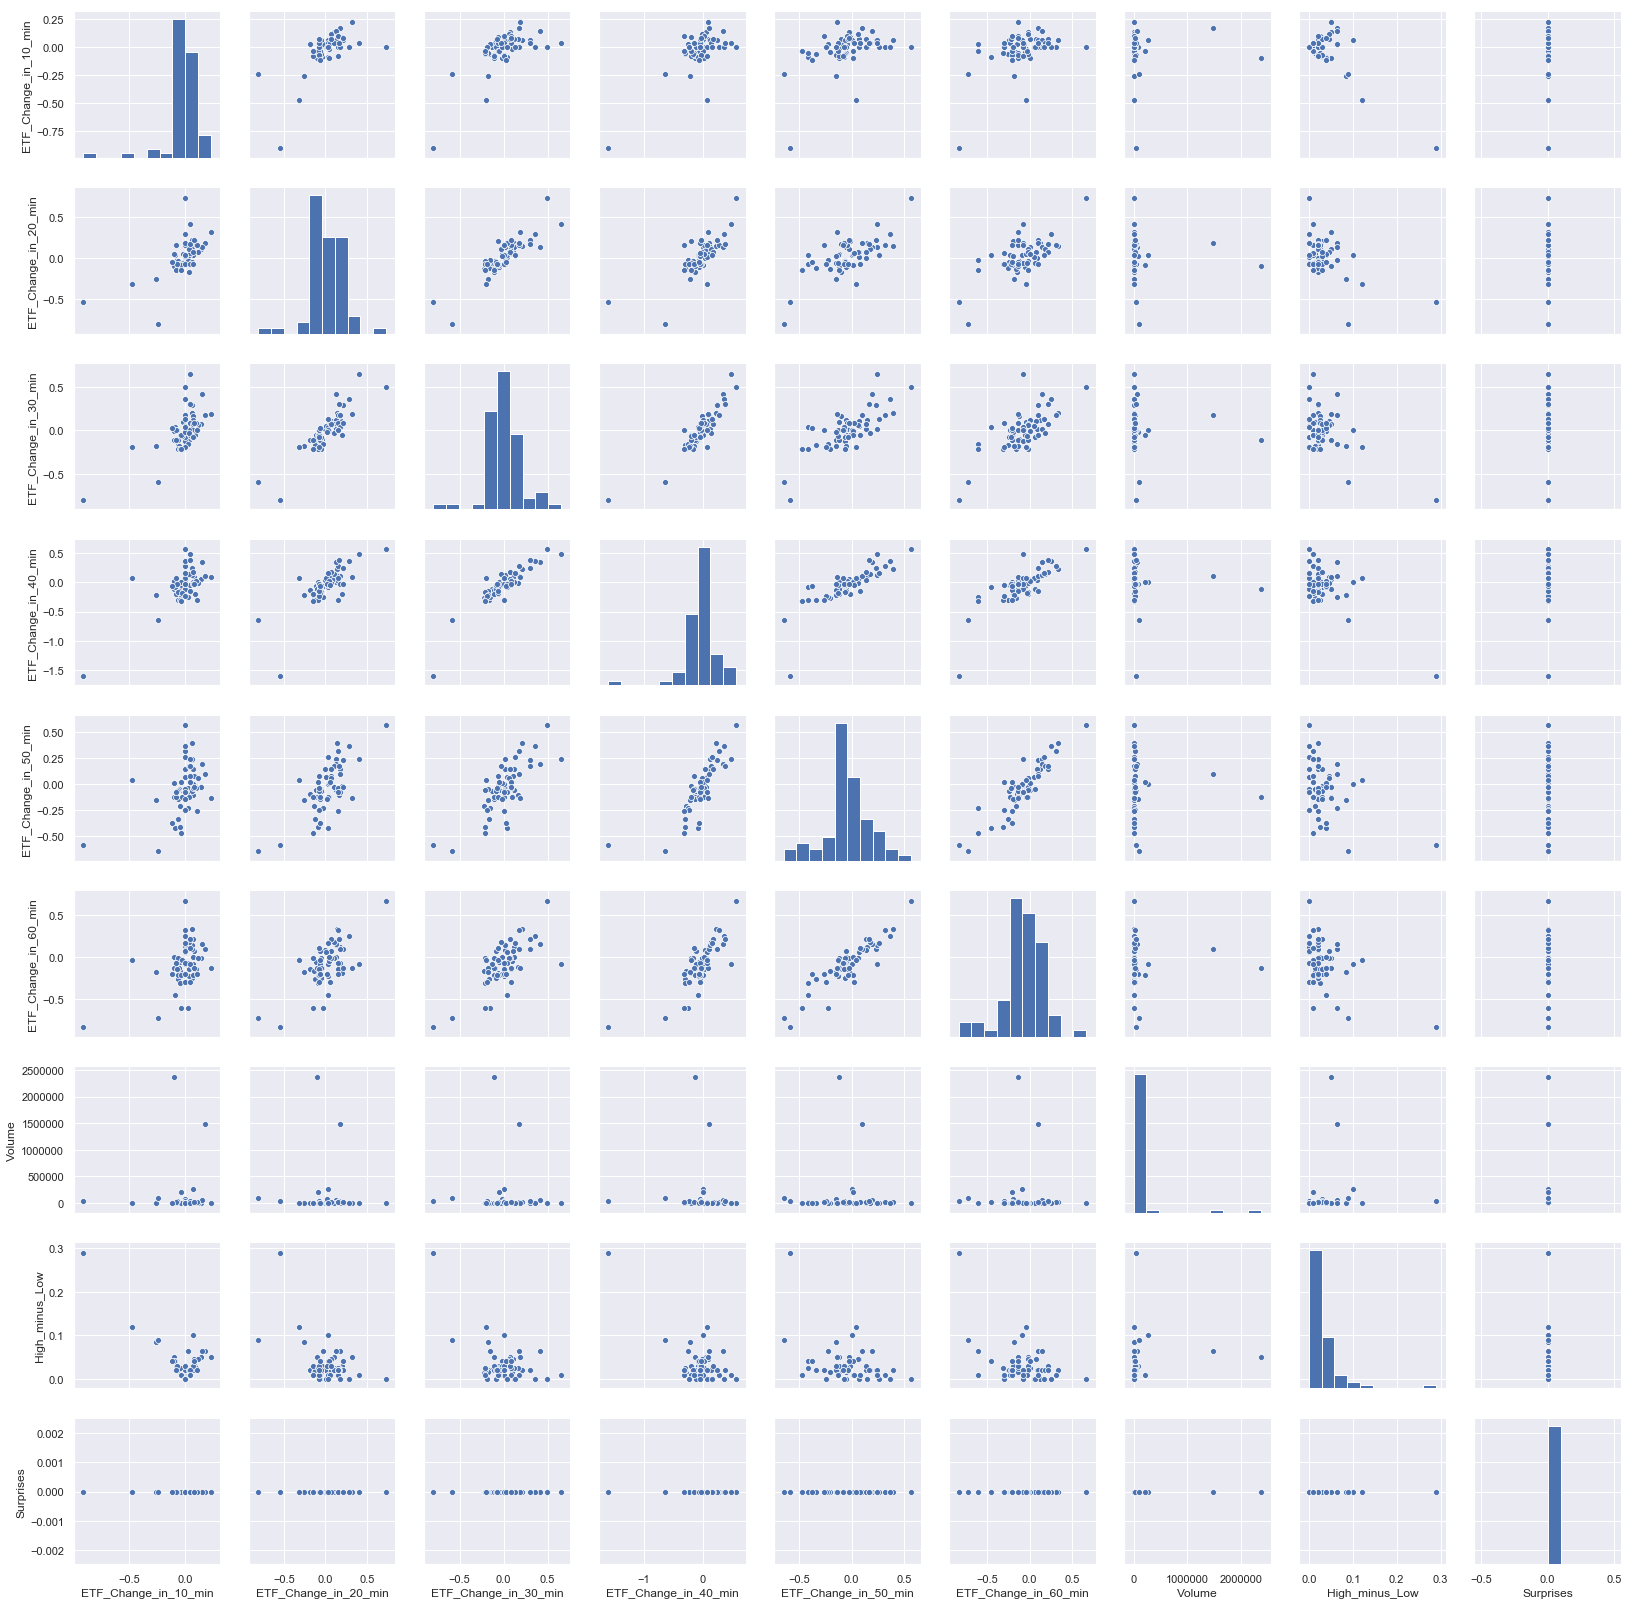

In [58]:
sns.pairplot(df3)